In [43]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import pandas_datareader as web
import datetime as dt 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [44]:
crypto_currency = 'BNB'
against_currency ='USD'

In [45]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()

In [46]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start, end)

In [72]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 30
future_days=0
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)-future_days):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_days,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1],1))

In [73]:
range(prediction_days, len(scaled_data))

range(30, 153)

In [74]:
# y_train

In [75]:
#creating neural netowrk
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=25, batch_size=32)

Epoch 1/25
4/4 [==============================] - 4s 41ms/step - loss: 0.1872
Epoch 2/25
4/4 [==============================] - 0s 35ms/step - loss: 0.0580
Epoch 3/25
4/4 [==============================] - 0s 37ms/step - loss: 0.0423
Epoch 4/25
4/4 [==============================] - 0s 39ms/step - loss: 0.0377
Epoch 5/25
4/4 [==============================] - 0s 38ms/step - loss: 0.0379
Epoch 6/25
4/4 [==============================] - 0s 37ms/step - loss: 0.0287
Epoch 7/25
4/4 [==============================] - 0s 36ms/step - loss: 0.0297
Epoch 8/25
4/4 [==============================] - 0s 36ms/step - loss: 0.0249
Epoch 9/25
4/4 [==============================] - 0s 36ms/step - loss: 0.0216
Epoch 10/25
4/4 [==============================] - 0s 37ms/step - loss: 0.0208
Epoch 11/25
4/4 [==============================] - 0s 37ms/step - loss: 0.0297
Epoch 12/25
4/4 [==============================] - 0s 38ms/step - loss: 0.0226
Epoch 13/25
4/4 [==============================] - 0s 35ms/st

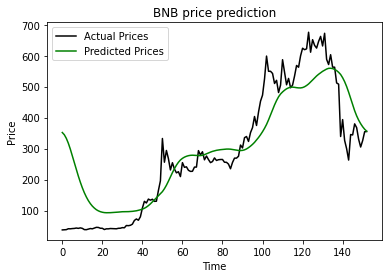

In [76]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices) 
plt.plot(actual_prices,color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [77]:
# Predict Next Day
real_data = [model_inputs[len(model_inputs) +1 - prediction_days: len(model_inputs) + 1,0]]
real_data = np.reshape(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print()

TypeError: _reshape_dispatcher() missing 1 required positional argument: 'newshape'